**Data**

In [1]:
import numpy as np
import pandas as pd

# set pandas to display the maximum range if necessary
pd.set_option("display.max_rows", None, "display.max_columns", None)
labelling = ['DE', 'FR', 'UK', 'SE', 'PT', 'IT', 'ES', 'DK','FI', 'EL']
df = pd.read_csv('IVVA4.tsv', sep='\t')
df = df.set_index('id')
df

,DE,FR,UK,SE,PT,IT,ES,DK,FI,EL
id,,,,,,,,,,
DE,30,15,5,2,2,10,15,1,1,7
FR,5,61,3,1,6,5,10,2,1,2
UK,15,5,25,2,10,12,28,2,5,6
SE,7,10,6,36,5,6,14,8,6,1
PT,6,8,11,9,27,2,36,4,1,1
IT,12,14,8,5,10,30,2,7,3,7
ES,4,15,3,1,16,3,44,3,2,3
DK,11,13,7,8,6,9,12,25,5,4
FI,8,11,9,13,2,3,18,7,27,1


**Scale the size of nodes**

Here, the node sizes are proportional to the square of the people who want to stay in their country/district.

In [2]:
node_sizes = [x*x for x in np.diag(df)]

**Create the two graphs**

One with all the edges (G), and the other with only ones of edge weight greater than 5 (G1).

In [3]:
import networkx as nx
from matplotlib.pyplot import figure

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', 
          '#999999', '#e41a1c', '#dede00', '#d3d3d3']
G = nx.DiGraph()
G1 = nx.DiGraph()
G.add_nodes_from(labelling)
G1.add_nodes_from(labelling)
for index, row in df.iterrows():
    for p, q in zip(row.index, row.values):
        if index != p:
            G.add_edge(index, p, weight=q)
            if q>5:
                G1.add_edge(index, p, weight=q)

**Display graph showing all the edges**

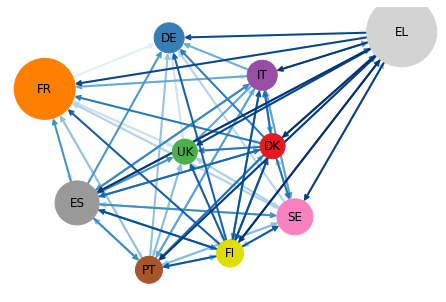

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

M = G.number_of_edges()
edge_colors = range(2, M + 2)
nx.draw(G, with_labels=True, node_color=colors, node_size=node_sizes, arrowstyle="->",
        arrowsize=10, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)

**Display graph showing edges with edge weight greater than 5**

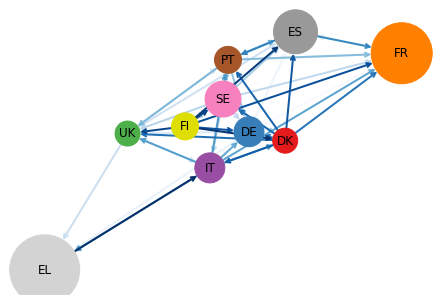

In [5]:
M = G1.number_of_edges()
edge_colors = range(2, M + 2)
nx.draw(G1, with_labels=True, node_color=colors, node_size=node_sizes, arrowstyle="->",
        arrowsize=10, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)